# SMS Spam Labeling

This project involves using natural language processing to create a model for flagging spam SMS.

## Data

The dataset is from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). It contains a collection of more than 5 thousand SMS phone messages.

**Using rstrip() plus a list comprehension to get a list of all the lines of text messages.**

In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


Printing the first ten messages and number them using **enumerate**.

In [2]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

This is a TSV(tab separated values) file, where the first column is a label saying whether the given message is a normal message(ham) or spam. The second column is the message itself.

**Importing pandas.**

In [3]:
import pandas as pd

**Reading into SMSSpamCollection file and creating a Dataframe named messages.**

In [4]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Using groupby to use describe by label.**

In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

**Making a new column to detect how long the text messages are.**

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='length', ylabel='Count'>

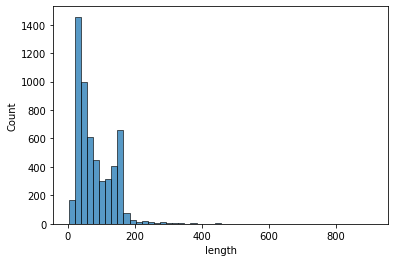

In [11]:
sns.histplot(data=messages,x='length',bins=50)

Looks like the length may be a good metric to determine spam.

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<AxesSubplot:xlabel='length', ylabel='Count'>

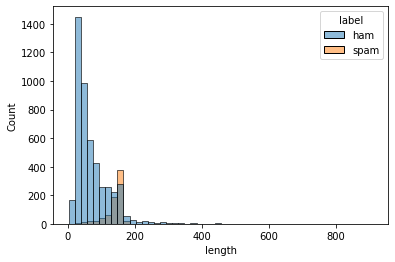

In [15]:
sns.histplot(data=messages,x='length', hue='label', bins=50)

Basic EDA shows a trend that spam messages tend to have more characters.

## Text Pre-processing

Raw messages will be converted into vectors using bag-of-words method.

**Importing the string library.**

In [16]:
import string

**Importing a list of english stopwords from NLTK.**

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**Defining a function to split a message into its individual words, return a list and remove very common words.**

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Tokenizing the messages.**

In [21]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Vectorization

**Importing CountVectorizer from sklearn.**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

**Specifying the analyzer argument to be the previously defined function text_process.**

In [24]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Printing total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [25]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [26]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


There are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once.

In [27]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


**Using .transform on the Bag-of-Words (bow) transformed object and transforming the entire DataFrame of messages.**

In [28]:
messages_bow = bow_transformer.transform(messages['message'])

In [29]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [30]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


**Using TF-IDF(term frequency-inverse document frequency) to do term weighting and normalization.**

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


**IDF of "u" and of word "university".**

In [32]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


**Transform the entire bag-of-words corpus into TF-IDF corpus.**

In [33]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training the Model

**Using the Naive Bayes classifier to train the model.**

In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Classifying our single random message and checking how we do:

In [35]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## Creating a Data Pipeline

**Running the model again and then predict off the test set using sklearn's Pipeline.**

In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [40]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001C6393AF1F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
predictions = pipeline.predict(msg_test)

## Model Evaluation

**Classification Report** 

In [42]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1005
        spam       0.70      1.00      0.82       110

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

